# Create geojson file from list of PUDO coords
See /home/test/Documents/PROJECTS/VFH/iPython_Notebooks/dv_pudo_profiles.ipynb for more info.  

ref: https://geoffboeing.com/2015/10/exporting-python-data-geojson/  
Huom: `with open(output_filename, 'wb') as output_file:` should be `'w'` not `'wb'`  

**Resources**  
geoJSON minifier: https://jsonformatter.org/json-minify  

In [1]:
import sys
sys.executable

'/home/nangini/anaconda3/bin/python'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

from IPython.display import HTML, display
import datetime
import matplotlib.dates as mdates
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os

from datetime import datetime

import json

# Functions

In [3]:
# https://geoffboeing.com/2015/10/exporting-python-data-geojson/
def df_to_geojson(df, properties, lat="latitude", lon="longitude"):
    geojson = {"type":"FeatureCollection", "features":[]}
    for _, row in df.iterrows():
        feature = {"type":"Feature",
                   "properties":{},
                   "geometry":{"type":"Point",
                               "coordinates":[]}}
        feature["geometry"]["coordinates"] = [row[lon],row[lat]]
        for prop in properties:
            feature["properties"][prop] = int(row[prop])
        geojson["features"].append(feature)
    return geojson

# GeoJSON properties for file

In [4]:
# Define the properties of the PUDO geojson file
prop = ["type","counts", "overlap"]

# Variables

In [5]:
# Stores final geojson file with all days of week, times of day, pu, do and pudo
megageo = {}
megageo

{}

In [6]:
ward=1
this_day = 'Saturday'
this_tod = 'nightIII'

In [7]:
if ward == 1:
    test_id1 = 20232410   # 13454935
    test_id2 = 13453946
elif ward == 10:
    test_id1 = 13467106 # Adelaide and John
    test_id2 = 13466303

# Read PUDO data from csv file

In [8]:
# fname = '../../../Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/FROM_PGADMIN/all_pudo_mon.csv'
fname = '~/Documents/PROJECTS/BDITTO/VFH/DATA_STORY/DATA/from_pgAdmin/all_pudo_mon.csv'

df = pd.read_csv(fname)

print(df.shape)
df.head(5)

(494842, 16)


,dow,timewindow,pickup_datetime,dropoff_datetime,pickup_ward2018,dropoff_ward2018,pickup_gc_intersection_id,dropoff_gc_intersection_id,pickup_neighbourhood,dropoff_neighbourhood,pickup_geom,dropoff_geom,lat_pickup,lon_pickup,lat_dropoff,lon_dropoff
0,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:34:01,18.0,10.0,13447475,13467654,51.0,77.0,0101000020E61000005BE2AF6670DA53C01D22DBEA93E2...,0101000020E610000013E6CE309BD953C0938FE7777DD2...,43.770139,-79.413110,43.644454,-79.400097
1,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:10:54,10.0,13.0,13467763,13464030,77.0,75.0,0101000020E610000051E519D30AD953C0C23B89A05BD2...,0101000020E610000079E6DB3E68D853C00F3AF08356D5...,43.643421,-79.391286,43.666703,-79.381363
2,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:12:34,13.0,10.0,13464551,13467763,71.0,77.0,0101000020E6100000A342F6F3C6D753C0E8EE4CFEEDD4...,0101000020E610000051E519D30AD953C0C23B89A05BD2...,43.663513,-79.371518,43.643421,-79.391286
3,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:24:18,13.0,3.0,13465140,13470547,75.0,19.0,0101000020E6100000DF5023ED39D853C020ED2E3976D4...,0101000020E610000004410BFFE5E153C041B447898CCC...,43.659858,-79.378536,43.598039,-79.529663
4,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:18:21,8.0,13.0,14044860,14673305,31.0,75.0,0101000020E6100000A37FC1EFB8DC53C070C432B4FCDB...,0101000020E61000008C84E11C68D853C062D98093A3D5...,43.718649,-79.448788,43.669054,-79.381355


In [9]:
list(df)

['dow',
 'timewindow',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_ward2018',
 'dropoff_ward2018',
 'pickup_gc_intersection_id',
 'dropoff_gc_intersection_id',
 'pickup_neighbourhood',
 'dropoff_neighbourhood',
 'pickup_geom',
 'dropoff_geom',
 'lat_pickup',
 'lon_pickup',
 'lat_dropoff',
 'lon_dropoff']

In [10]:
df['timewindow'].unique()

array(['nightII', 'outside_windows', 'nightIII', 'amPeak', 'midday',
       'pmPeak', 'nightI'], dtype=object)

In [11]:
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'pickup_gc_intersection_id'].count())
df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak')]

12


,dow,timewindow,pickup_datetime,dropoff_datetime,pickup_ward2018,dropoff_ward2018,pickup_gc_intersection_id,dropoff_gc_intersection_id,pickup_neighbourhood,dropoff_neighbourhood,pickup_geom,dropoff_geom,lat_pickup,lon_pickup,lat_dropoff,lon_dropoff
38950,Monday,amPeak,2018-09-03 07:00:00,2018-09-03 07:08:41,1.0,1.0,20232410,30081632,1.0,1.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E61000002D3BBACD78E353C00F64DF43F9DA...,43.728927,-79.60573,43.710732,-79.554248
88959,Monday,amPeak,2018-09-10 08:00:00,2018-09-10 08:12:39,1.0,1.0,20232410,20232410,1.0,1.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,43.728927,-79.60573,43.728927,-79.605730
97207,Monday,amPeak,2018-09-17 07:00:00,2018-09-17 07:12:16,1.0,1.0,20232410,13458127,1.0,1.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E61000002B190A1CACE453C05F98C323EED9...,43.728927,-79.60573,43.702580,-79.573005
140853,Monday,amPeak,2018-09-24 07:00:00,2018-09-24 07:21:00,1.0,1.0,20232410,30081635,1.0,6.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E6100000786CE01B3EE353C0C5D0B23AAEDA...,43.728927,-79.60573,43.708442,-79.550666
140854,Monday,amPeak,2018-09-24 07:00:00,2018-09-24 07:21:00,1.0,1.0,20232410,30081635,1.0,6.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E6100000786CE01B3EE353C0C5D0B23AAEDA...,43.728927,-79.60573,43.708442,-79.550666
183409,Monday,amPeak,2018-09-03 07:00:00,2018-09-03 07:15:17,1.0,3.0,20232410,30071354,1.0,14.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E6100000A29221642CE253C0679E157ED4CF...,43.728927,-79.60573,43.623672,-79.533959
240279,Monday,amPeak,2018-09-17 08:00:00,2018-09-17 08:47:05,1.0,21.0,20232410,13449905,1.0,126.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E610000043B0776D19D153C0E5BAE7C823E0...,43.728927,-79.60573,43.751092,-79.267177
240582,Monday,amPeak,2018-09-17 08:00:00,2018-09-17 08:22:07,1.0,3.0,20232410,13470591,1.0,19.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E6100000BD3611B95DE153C07D60FC7151CC...,43.728927,-79.60573,43.596236,-79.521345
246059,Monday,amPeak,2018-09-17 07:00:00,2018-09-17 07:58:57,1.0,21.0,20232410,20102020,1.0,127.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E61000004EDEF8C1F6D053C03FE99A8262E0...,43.728927,-79.60573,43.753006,-79.265061
258887,Monday,amPeak,2018-09-24 08:00:00,2018-09-24 08:11:44,1.0,1.0,20232410,13460408,1.0,1.0,0101000020E610000075DC3A49C4E653C09A9B9F7D4DDD...,0101000020E61000003C54D9CB04E553C07379977E4ED8...,43.728927,-79.60573,43.689895,-79.578418


In [12]:
df.loc[(df['dropoff_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'dropoff_gc_intersection_id'].count()

151

In [13]:
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['pickup_gc_intersection_id']==test_id1) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0), ['pickup_datetime','pickup_gc_intersection_id','dropoff_ward2018','dow','timewindow']]

0


,pickup_datetime,pickup_gc_intersection_id,dropoff_ward2018,dow,timewindow


In [14]:
print(df.loc[(df['pickup_gc_intersection_id']==test_id2) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['pickup_gc_intersection_id']==test_id2) & 
       (df['dow']=='Monday') & (df['timewindow']=='pmPeak') &
       (df['pickup_ward2018']==10.0), ['pickup_datetime','pickup_gc_intersection_id','dropoff_ward2018','dow','timewindow']]

0


,pickup_datetime,pickup_gc_intersection_id,dropoff_ward2018,dow,timewindow


In [15]:
thisid = 13453946

print(df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak'),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak')][['pickup_ward2018','dropoff_ward2018','dow','timewindow']]

17


,pickup_ward2018,dropoff_ward2018,dow,timewindow
21103,10.0,1.0,Monday,amPeak
55108,1.0,1.0,Monday,amPeak
125591,7.0,1.0,Monday,amPeak
125592,1.0,1.0,Monday,amPeak
133786,5.0,1.0,Monday,amPeak
133882,15.0,1.0,Monday,amPeak
141570,7.0,1.0,Monday,amPeak
286280,3.0,1.0,Monday,amPeak
286295,1.0,1.0,Monday,amPeak
298822,8.0,1.0,Monday,amPeak


In [16]:
thisid = 13453946

print(df.loc[((df['pickup_gc_intersection_id']==thisid) | (df['dropoff_gc_intersection_id']==thisid)) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak'),
       'dropoff_gc_intersection_id'].count())

df.loc[((df['pickup_gc_intersection_id']==thisid) | (df['dropoff_gc_intersection_id']==thisid)) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak')][['pickup_ward2018','dropoff_ward2018','dow','timewindow']]

19


,pickup_ward2018,dropoff_ward2018,dow,timewindow
21103,10.0,1.0,Monday,amPeak
55108,1.0,1.0,Monday,amPeak
82562,1.0,1.0,Monday,amPeak
125591,7.0,1.0,Monday,amPeak
125592,1.0,1.0,Monday,amPeak
133786,5.0,1.0,Monday,amPeak
133882,15.0,1.0,Monday,amPeak
141570,7.0,1.0,Monday,amPeak
238816,1.0,21.0,Monday,amPeak
286280,3.0,1.0,Monday,amPeak


In [17]:
# check neighbourhoods
print(df.loc[(df['timewindow']=="amPeak") & (df['pickup_ward2018']==ward), 'pickup_neighbourhood'].sort_values().unique())
print(df.loc[(df['timewindow']=="amPeak") & (df['dropoff_ward2018']==ward), 'dropoff_neighbourhood'].sort_values().unique())

[1. 2. 3. 4. 5. 6. 7. 8.]
[1. 2. 3. 4. 5. 6. 7.]


# Housekeeping

## 1. Round lat, lon to 4 decimal places

In [18]:
n=4 # number of decimals to round to

df['lat_pickup'] = df['lat_pickup'].round(decimals=n)
df['lon_pickup'] = df['lon_pickup'].round(decimals=n)

df['lat_dropoff'] = df['lat_dropoff'].round(decimals=n)
df['lon_dropoff'] = df['lon_dropoff'].round(decimals=n)

In [19]:
np.round(-79.60573035, decimals=n)

-79.6057

In [20]:
np.round(43.7289273, decimals=n)

43.7289

## 2. Filter out rows where neither pickup or dropoff wards are the ward of interest
Make col `keep` = 1 for where pick-up or for drop-off wards are the ward of interest

In [21]:
# Assign a Pickup or Dropoff in column 'type'
df['keep'] = np.nan
df['latitude'] = np.nan
df['longitude'] = np.nan

df.loc[(df['pickup_ward2018']==ward) | (df['dropoff_ward2018']==ward), 'keep'] = 1

In [22]:
# Check
df['keep'].unique()

array([nan,  1.])

In [23]:
# Keep only rows where `keep` is not null
df = df[df['keep'].notnull()]

In [24]:
# Check
df['keep'].unique()

array([1.])

In [25]:
print(df.shape)

(18462, 19)


In [26]:
df.head(5)

,dow,timewindow,pickup_datetime,dropoff_datetime,pickup_ward2018,dropoff_ward2018,pickup_gc_intersection_id,dropoff_gc_intersection_id,pickup_neighbourhood,dropoff_neighbourhood,pickup_geom,dropoff_geom,lat_pickup,lon_pickup,lat_dropoff,lon_dropoff,keep,latitude,longitude
6,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:13:26,1.0,1.0,30082386,13460542,1.0,1.0,0101000020E61000002E8E37EAE2E653C01D39868BD2DC...,0101000020E61000001223231E8BE653C012195BAA40D8...,43.7252,-79.6076,43.6895,-79.6022,1.0,NaN,NaN
65,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:13:36,6.0,1.0,30109966,13451158,26.0,2.0,0101000020E6100000F094730106DF53C0346577E63DDF...,0101000020E61000002595DD571BE553C04E5E8510A7DF...,43.7441,-79.4847,43.7473,-79.5798,1.0,NaN,NaN
77,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:22:29,1.0,9.0,13461025,14047180,1.0,94.0,0101000020E6100000A9ABCBC11DE653C075770AAAE7D7...,0101000020E6100000B94BF948BEDB53C0D4C5FE9626D6...,43.6868,-79.5956,43.6731,-79.4335,1.0,NaN,NaN
92,Monday,nightII,2018-09-03 01:00:00,2018-09-03 01:04:16,1.0,1.0,13451763,13450652,1.0,1.0,0101000020E6100000716B477BC0E653C0A2CEA29838DF...,0101000020E6100000DF7A0DF462E653C0EC776DDE14E0...,43.7439,-79.6055,43.7506,-79.5998,1.0,NaN,NaN
110,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:42:09,25.0,1.0,13441921,14075750,131.0,1.0,0101000020E61000008BC12B98A4CD53C04A9D99C3E2E8...,0101000020E6100000BBD25DD28BE653C029598BA581DC...,43.8194,-79.2132,43.7227,-79.6023,1.0,NaN,NaN


In [27]:
# Test again!! => ok
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'pickup_gc_intersection_id'].count())
df.loc[(df['dropoff_gc_intersection_id']==test_id1) & (df['dow']=='Monday') & (df['timewindow']=='amPeak'),'dropoff_gc_intersection_id'].count()

12


151

In [28]:
# Test again!! => ok
print(df.loc[(df['pickup_gc_intersection_id']==test_id1) & (df['dow']==this_day) & 
             (df['pickup_ward2018']==ward) &
             (df['timewindow']==this_tod),'pickup_gc_intersection_id'].count())

0


## 3. Mark if row is a pickup or a dropoff
pickup is where pickup ward == ward, dropoff is where dropoff_ward == ward  
Note that a row can contain **both** a pickup and a dropoff !!!  

In [29]:
df['pu'] = np.nan
df['do'] = np.nan

In [30]:
df.loc[df['pickup_ward2018']==ward, 'pu'] = 1

In [31]:
df.loc[df['dropoff_ward2018']==ward, 'do'] = 1

In [32]:
# Check
df.loc[df['dropoff_ward2018']==ward, 
       ['dow','timewindow','pickup_datetime','dropoff_datetime',
        'lat_pickup','lon_pickup','pickup_gc_intersection_id',
        'lat_dropoff','lon_dropoff','dropoff_gc_intersection_id',
        'pickup_ward2018','dropoff_ward2018','pu','do']].head(11)

,dow,timewindow,pickup_datetime,dropoff_datetime,lat_pickup,lon_pickup,pickup_gc_intersection_id,lat_dropoff,lon_dropoff,dropoff_gc_intersection_id,pickup_ward2018,dropoff_ward2018,pu,do
6,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:13:26,43.7252,-79.6076,30082386,43.6895,-79.6022,13460542,1.0,1.0,1.0,1.0
65,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:13:36,43.7441,-79.4847,30109966,43.7473,-79.5798,13451158,6.0,1.0,NaN,1.0
92,Monday,nightII,2018-09-03 01:00:00,2018-09-03 01:04:16,43.7439,-79.6055,13451763,43.7506,-79.5998,13450652,1.0,1.0,1.0,1.0
110,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:42:09,43.8194,-79.2132,13441921,43.7227,-79.6023,14075750,25.0,1.0,NaN,1.0
111,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:08:17,43.7585,-79.5930,30091827,43.7338,-79.5935,13453287,1.0,1.0,1.0,1.0
126,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:03:47,43.7199,-79.5608,13455313,43.7133,-79.5597,13456371,1.0,1.0,1.0,1.0
181,Monday,nightII,2018-09-03 00:00:00,2018-09-03 00:30:08,43.7923,-79.4411,13444614,43.7169,-79.6035,13455879,18.0,1.0,NaN,1.0
277,Monday,nightII,2018-09-03 01:00:00,2018-09-03 01:04:27,43.6908,-79.5974,13460293,43.6783,-79.5850,13462531,1.0,1.0,1.0,1.0
389,Monday,outside_windows,2018-09-03 02:00:00,2018-09-03 02:07:40,43.7297,-79.5643,13453937,43.7325,-79.6010,13453509,1.0,1.0,1.0,1.0
392,Monday,outside_windows,2018-09-03 02:00:00,2018-09-03 02:07:25,43.7087,-79.4781,13456952,43.7015,-79.5573,13458251,5.0,1.0,NaN,1.0


In [33]:
thisid = 13453946

print(df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak'),
       'dropoff_gc_intersection_id'].count())

df.loc[(df['dropoff_gc_intersection_id']==thisid) & 
       (df['dow']=='Monday') & (df['timewindow']=='amPeak')][['pickup_ward2018','dropoff_ward2018','dow','timewindow','pu','do']]

17


,pickup_ward2018,dropoff_ward2018,dow,timewindow,pu,do
21103,10.0,1.0,Monday,amPeak,NaN,1.0
55108,1.0,1.0,Monday,amPeak,1.0,1.0
125591,7.0,1.0,Monday,amPeak,NaN,1.0
125592,1.0,1.0,Monday,amPeak,1.0,1.0
133786,5.0,1.0,Monday,amPeak,NaN,1.0
133882,15.0,1.0,Monday,amPeak,NaN,1.0
141570,7.0,1.0,Monday,amPeak,NaN,1.0
286280,3.0,1.0,Monday,amPeak,NaN,1.0
286295,1.0,1.0,Monday,amPeak,1.0,1.0
298822,8.0,1.0,Monday,amPeak,NaN,1.0


## 4a. Aggregate pickups and dropoffs for this_tod

In [34]:
list(df)

['dow',
 'timewindow',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_ward2018',
 'dropoff_ward2018',
 'pickup_gc_intersection_id',
 'dropoff_gc_intersection_id',
 'pickup_neighbourhood',
 'dropoff_neighbourhood',
 'pickup_geom',
 'dropoff_geom',
 'lat_pickup',
 'lon_pickup',
 'lat_dropoff',
 'lon_dropoff',
 'keep',
 'latitude',
 'longitude',
 'pu',
 'do']

In [35]:
df_agg_pu = pd.DataFrame()

df_agg_pu = df.loc[(df['pickup_ward2018']==ward) & (df['timewindow']==this_tod)].groupby(
    ['dow','timewindow','lat_pickup','lon_pickup','pickup_gc_intersection_id', 'pickup_neighbourhood']
    ).size().reset_index(name='pcounts')

df_agg_pu = df_agg_pu.rename(columns={'lat_pickup': 'latitude'})
df_agg_pu = df_agg_pu.rename(columns={'lon_pickup': 'longitude'})
df_agg_pu = df_agg_pu.rename(columns={'pickup_gc_intersection_id': 'intersection_id'})
df_agg_pu = df_agg_pu.rename(columns={'pickup_neighbourhood': 'nn'})

df_agg_pu.head(11)

,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts
0,Monday,nightIII,43.6745,-79.5632,13463137,11.0,2
1,Monday,nightIII,43.6757,-79.5684,13462944,7.0,20
2,Monday,nightIII,43.6768,-79.5642,13462745,7.0,3
3,Monday,nightIII,43.6769,-79.5911,13462783,1.0,1
4,Monday,nightIII,43.6783,-79.5850,13462531,1.0,9
5,Monday,nightIII,43.6787,-79.5883,13462468,1.0,1
6,Monday,nightIII,43.6797,-79.5694,13462270,7.0,1
7,Monday,nightIII,43.6807,-79.5669,13462062,7.0,2
8,Monday,nightIII,43.6808,-79.5929,13462101,1.0,2
9,Monday,nightIII,43.6866,-79.5994,13461072,1.0,4


In [36]:
df_agg_pu.loc[(df_agg_pu['intersection_id']==13453946) & 
                 (df_agg_pu['timewindow']=='amPeak')                 
                ]

,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts


In [37]:
df_agg_do = pd.DataFrame()

df_agg_do = df.loc[(df['dropoff_ward2018']==ward) & (df['timewindow']==this_tod)].groupby(
    ['dow','timewindow','lat_dropoff','lon_dropoff','dropoff_gc_intersection_id', 'dropoff_neighbourhood']
    ).size().reset_index(name='dcounts')

df_agg_do = df_agg_do.rename(columns={'lat_dropoff': 'latitude'})
df_agg_do = df_agg_do.rename(columns={'lon_dropoff': 'longitude'})
df_agg_do = df_agg_do.rename(columns={'dropoff_gc_intersection_id': 'intersection_id'})
df_agg_do = df_agg_do.rename(columns={'dropoff_neighbourhood': 'nn'})

df_agg_do.head(11)

,dow,timewindow,latitude,longitude,intersection_id,nn,dcounts
0,Monday,nightIII,43.6709,-79.5904,13463803,1.0,3
1,Monday,nightIII,43.6720,-79.5848,13463596,1.0,1
2,Monday,nightIII,43.6727,-79.5921,13463477,1.0,1
3,Monday,nightIII,43.6745,-79.5632,13463137,11.0,4
4,Monday,nightIII,43.6757,-79.5684,13462944,7.0,14
5,Monday,nightIII,43.6764,-79.5932,13462876,1.0,1
6,Monday,nightIII,43.6765,-79.5732,13462820,7.0,3
7,Monday,nightIII,43.6768,-79.5642,13462745,7.0,2
8,Monday,nightIII,43.6775,-79.5680,13462642,7.0,1
9,Monday,nightIII,43.6778,-79.5743,13462608,7.0,1


In [38]:
df_agg_do.loc[(df_agg_do['intersection_id']==13453946) & 
                 (df_agg_do['timewindow']=='amPeak')                 
                ]

,dow,timewindow,latitude,longitude,intersection_id,nn,dcounts


In [39]:
print(df_agg_pu.shape)
print(df_agg_do.shape)

(197, 7)
(244, 7)


In [40]:
# Check for duplicate intersection_id
df_agg_pu.loc[df_agg_pu['intersection_id'].duplicated()]

,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts


In [41]:
# Check for duplicate intersection_id
df_agg_do.loc[df_agg_do['intersection_id'].duplicated()]

,dow,timewindow,latitude,longitude,intersection_id,nn,dcounts


In [42]:
df_agg_pu.loc[(df_agg_pu['intersection_id']==20232410) ]

,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts
98,Monday,nightIII,43.7289,-79.6057,20232410,1.0,2


In [43]:
df_agg_do.loc[(df_agg_do['intersection_id']==20232410) ]

,dow,timewindow,latitude,longitude,intersection_id,nn,dcounts
139,Monday,nightIII,43.7289,-79.6057,20232410,1.0,4


## 5. Stack pickups on top of dropoffs

In [44]:
# Add empty columns to allow stacking

df_agg_pu=df_agg_pu.assign(dcounts=0)
df_agg_do=df_agg_do.assign(pcounts=0)

In [45]:
# stack
print(df_agg_pu.shape)
print(df_agg_do.shape)

df_merge=pd.concat([df_agg_pu, df_agg_do],sort=False)

print(df_merge.shape)
df_merge.head(11)

(197, 8)
(244, 8)
(441, 8)


,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts,dcounts
0,Monday,nightIII,43.6745,-79.5632,13463137,11.0,2,0
1,Monday,nightIII,43.6757,-79.5684,13462944,7.0,20,0
2,Monday,nightIII,43.6768,-79.5642,13462745,7.0,3,0
3,Monday,nightIII,43.6769,-79.5911,13462783,1.0,1,0
4,Monday,nightIII,43.6783,-79.5850,13462531,1.0,9,0
5,Monday,nightIII,43.6787,-79.5883,13462468,1.0,1,0
6,Monday,nightIII,43.6797,-79.5694,13462270,7.0,1,0
7,Monday,nightIII,43.6807,-79.5669,13462062,7.0,2,0
8,Monday,nightIII,43.6808,-79.5929,13462101,1.0,2,0
9,Monday,nightIII,43.6866,-79.5994,13461072,1.0,4,0


In [46]:
# Check
this_id=20232410  #13453946
df_merge.loc[df_merge['intersection_id']==this_id]

,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts,dcounts
98,Monday,nightIII,43.7289,-79.6057,20232410,1.0,2,0
139,Monday,nightIII,43.7289,-79.6057,20232410,1.0,0,4


## 6. Group on common `intersection_id`

In [47]:
df_merge.loc[df_merge['intersection_id']==13453946]

,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts,dcounts
141,Monday,nightIII,43.7301,-79.6049,13453946,1.0,0,3


In [48]:
df_merge.loc[df_merge['intersection_id']==30092304]

,dow,timewindow,latitude,longitude,intersection_id,nn,pcounts,dcounts
13,Monday,nightIII,43.6816,-79.567,30092304,7.0,0,1


In [49]:
df_merge_gr=pd.DataFrame()

df_merge_gr=df_merge.groupby(['intersection_id','latitude','longitude'],as_index=False).sum()

print(df_merge_gr.shape)
df_merge_gr.head(11)

(361, 6)


,intersection_id,latitude,longitude,nn,pcounts,dcounts
0,13449225,43.7601,-79.5861,2.0,1,0
1,13449294,43.7596,-79.5899,2.0,0,1
2,13449352,43.7593,-79.5970,2.0,0,1
3,13449386,43.7590,-79.5957,2.0,1,0
4,13449457,43.7585,-79.5894,4.0,2,3
5,13449574,43.7579,-79.6034,2.0,0,2
6,13449649,43.7572,-79.5904,4.0,1,3
7,13449735,43.7567,-79.6012,4.0,1,1
8,13449781,43.7563,-79.5944,2.0,1,0
9,13449783,43.7562,-79.5883,4.0,1,5


In [50]:
df_merge_gr.loc[df_merge_gr['intersection_id']==20232410]

,intersection_id,latitude,longitude,nn,pcounts,dcounts
341,20232410,43.7289,-79.6057,2.0,2,4


In [51]:
# Check
this_id=20232410
df_merge_gr.loc[df_merge_gr['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts
341,20232410,43.7289,-79.6057,2.0,2,4


In [52]:
# Check
this_id=13453946
df_merge_gr.loc[df_merge_gr['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts
154,13453946,43.7301,-79.6049,1.0,0,3


## 6. Make the dataframes for each layer!

### a. PUDO layer from `df_merge_gr`

In [53]:
df_pudo_layer = pd.DataFrame()

In [54]:
df_pudo_layer = df_merge_gr.loc[(df_merge_gr['pcounts']>0) & (df_merge_gr['dcounts']>0)]

In [55]:
print(df_pudo_layer.shape)

(80, 6)


In [56]:
# Check
this_id=20232410   #13453946
df_pudo_layer.loc[df_pudo_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts
341,20232410,43.7289,-79.6057,2.0,2,4


In [57]:
# Check
this_id=13453946
df_pudo_layer.loc[df_pudo_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts


### a. PU layer and DO layer from `df_merge`

In [58]:
df_pu_layer = pd.DataFrame()
df_do_layer = pd.DataFrame()

In [59]:
df_pu_layer = df_merge_gr.loc[(df_merge_gr['pcounts']>0) & (df_merge_gr['dcounts']==0)]
df_do_layer = df_merge_gr.loc[(df_merge_gr['pcounts']==0) & (df_merge_gr['dcounts']>0)]

In [60]:
# Check
this_id=20232410   #13453946
df_pu_layer.loc[df_pu_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts


In [61]:
# Check
this_id=13453946
df_pu_layer.loc[df_pu_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts


In [62]:
# Check
this_id=13453946
df_do_layer.loc[df_do_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts
154,13453946,43.7301,-79.6049,1.0,0,3


# Histograms of counts
https://mode.com/example-gallery/python_histogram/

In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

def counts_hist(df, col, nbins):
    ax = df.hist(column=col, bins=nbins, grid=True, color='#86bf91', zorder=2, rwidth=0.9)

    ax = ax[0]
    for x in ax:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", 
                      labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel(col, labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Bin counts", labelpad=20, weight='bold', size=12)

        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [64]:
df_pudo_layer['sum'] = np.nan

df_pudo_layer['sum'] = df_pudo_layer['dcounts'] + df_pudo_layer['pcounts']
df_pudo_layer.head(10)

/home/nangini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nangini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,intersection_id,latitude,longitude,nn,pcounts,dcounts,sum
4,13449457,43.7585,-79.5894,4.0,2,3,5
6,13449649,43.7572,-79.5904,4.0,1,3,4
7,13449735,43.7567,-79.6012,4.0,1,1,2
9,13449783,43.7562,-79.5883,4.0,1,5,6
11,13449992,43.7550,-79.5884,4.0,5,3,8
13,13450132,43.7542,-79.6020,2.0,1,1,2
14,13450184,43.7536,-79.5871,4.0,2,3,5
39,13451253,43.7468,-79.5838,4.0,5,5,10
40,13451305,43.7462,-79.5686,6.0,4,2,6
49,13451672,43.7443,-79.5954,4.0,3,1,4


In [65]:
print('w' +repr(ward), this_day, this_tod)

w1 Saturday nightIII


In [66]:
# Check for duplicate intersection_id
df_pu_layer.loc[df_pu_layer['intersection_id'].duplicated()]

,intersection_id,latitude,longitude,nn,pcounts,dcounts


In [67]:
print(df_pu_layer.shape)
print(df_pu_layer['pcounts'].max())
print(df_pu_layer['pcounts'].min())
df_pu_layer.head(5)

(117, 6)
7
1


,intersection_id,latitude,longitude,nn,pcounts,dcounts
0,13449225,43.7601,-79.5861,2.0,1,0
3,13449386,43.7590,-79.5957,2.0,1,0
8,13449781,43.7563,-79.5944,2.0,1,0
15,13450210,43.7537,-79.6054,1.0,1,0
16,13450296,43.7531,-79.5971,2.0,2,0


7
pickups bin width: 0.7
6
dropoffs bin width: 0.6
49
pudos bin width: 1.75


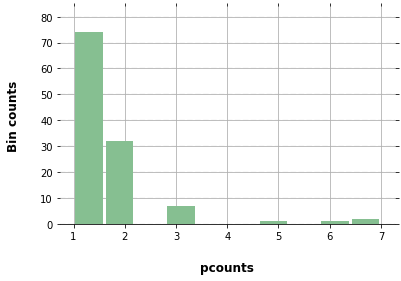

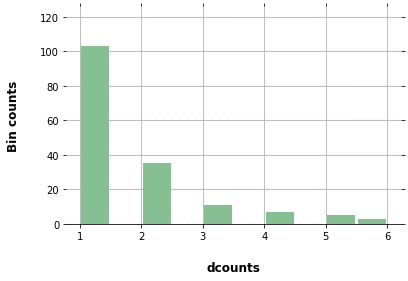

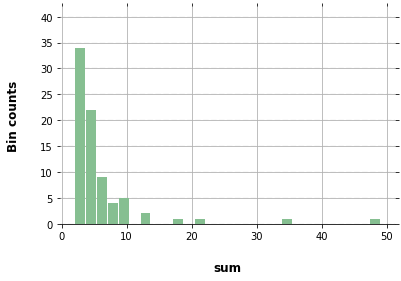

In [68]:
nbins = 10
print(df_pu_layer['pcounts'].max())
print('pickups bin width: ' + repr(df_pu_layer['pcounts'].max()/nbins))

counts_hist(df_pu_layer, 'pcounts', nbins)

print(df_do_layer['dcounts'].max())
print('dropoffs bin width: ' + repr(df_do_layer['dcounts'].max()/nbins))
counts_hist(df_do_layer, 'dcounts', nbins)

nbins = 28
print(df_pudo_layer['sum'].max())
print('pudos bin width: ' + repr(df_pudo_layer['sum'].max()/nbins))
counts_hist(df_pudo_layer, 'sum', nbins)

In [69]:
df_pudo_layer.loc[df_pudo_layer['sum']==df_pudo_layer['sum'].max()]

,intersection_id,latitude,longitude,nn,pcounts,dcounts,sum
222,13455879,43.7169,-79.6035,2.0,32,17,49


In [70]:
print(len(df_pu_layer['intersection_id'].unique()))
print(len(df_do_layer['intersection_id'].unique()))
print(len(df_pudo_layer['intersection_id'].unique()))

117
164
80


In [71]:
# df=

# Save to geojson

In [72]:
print('w' +repr(ward), this_day, this_tod)

w1 Saturday nightIII


In [73]:
df_do_layer.head(5)

,intersection_id,latitude,longitude,nn,pcounts,dcounts
1,13449294,43.7596,-79.5899,2.0,0,1
2,13449352,43.7593,-79.5970,2.0,0,1
5,13449574,43.7579,-79.6034,2.0,0,2
10,13449904,43.7557,-79.6023,1.0,0,1
12,13450025,43.7549,-79.5987,2.0,0,1


In [74]:
this_id=13453946
df_pudo_layer.loc[df_pudo_layer['intersection_id']==this_id]

,intersection_id,latitude,longitude,nn,pcounts,dcounts,sum


In [75]:
df_pudo_layer.sort_values('dcounts',ascending=False).head(9)

,intersection_id,latitude,longitude,nn,pcounts,dcounts,sum
312,13462101,43.6808,-79.5929,2.0,2,20,22
222,13455879,43.7169,-79.6035,2.0,32,17,49
323,13462944,43.6757,-79.5684,14.0,20,14,34
307,13461025,43.6868,-79.5956,2.0,7,11,18
298,13460389,43.6901,-79.5845,2.0,3,10,13
308,13461072,43.6866,-79.5994,2.0,4,9,13
227,13456080,43.7151,-79.5551,10.0,2,7,9
269,13458383,43.7011,-79.5952,2.0,2,6,8
251,13457663,43.7058,-79.5903,2.0,2,6,8


## Apply cut-off filter
Only counts > `c` will be saved.  

In [76]:
c = 9 # cut-off

In [77]:
print(df_pu_layer.loc[(df_pu_layer['pcounts']>=c),'pcounts'].count())
df_pu_layer.loc[(df_pu_layer['pcounts']>=c)]

0


,intersection_id,latitude,longitude,nn,pcounts,dcounts


In [78]:
print(df_do_layer.loc[(df_do_layer['dcounts']>=c),'dcounts'].count())
df_do_layer.loc[(df_do_layer['dcounts']>=c)]

0


,intersection_id,latitude,longitude,nn,pcounts,dcounts


In [79]:
print(df_pudo_layer.loc[((df_pudo_layer['pcounts']+df_pudo_layer['dcounts']) >= c),'dcounts'].count())
df_pudo_layer.loc[(df_pudo_layer['dcounts']>=c)].head(4)

11


,intersection_id,latitude,longitude,nn,pcounts,dcounts,sum
222,13455879,43.7169,-79.6035,2.0,32,17,49
298,13460389,43.6901,-79.5845,2.0,3,10,13
307,13461025,43.6868,-79.5956,2.0,7,11,18
308,13461072,43.6866,-79.5994,2.0,4,9,13


In [80]:
this_id=13453946
df_pudo_layer.loc[ ((df_pudo_layer['pcounts']+df_pudo_layer['dcounts']) >= c) &
                  (df_pudo_layer['intersection_id'] == thisid)
                                                    ]

,intersection_id,latitude,longitude,nn,pcounts,dcounts,sum


In [81]:
geojson_pu_layer = df_to_geojson(df_pu_layer.loc[(df_pu_layer["pcounts"]>=c)], ["pcounts","nn"])

In [82]:
geojson_do_layer = df_to_geojson(df_do_layer.loc[(df_do_layer["dcounts"]>=c)], ["dcounts","nn"])

In [83]:
# geojson_pudo_layer = df_to_geojson(df_pudo_layer.loc[(df_pudo_layer['pcounts']>=c) &
#                                                      (df_pudo_layer['dcounts']>=c)
#                                                     ], ['pcounts','dcounts'])

geojson_pudo_layer = df_to_geojson(df_pudo_layer.loc[
    ((df_pudo_layer["pcounts"]+df_pudo_layer["dcounts"]) >= c)
                                                    ], ["pcounts","dcounts","nn"])

# geoJSON format for this_day, this_tod
Format:  
```
this_day: {
		this_tod: {
			'pu': geojson_pu_layer,
			'pudo':geojson_pudo_layer,
			'do':geojson_do_layer
		}
 ``` 
 
 e.g.
 
 ```
'Monday': {
		'amPeak': {
			'pu':geojson_pu_layer,
			'pudo':geojson_pudo_layer,
			'do':geojson_do_layer
		}
 ```

In [84]:
print('w' +repr(ward), this_day, this_tod)

w1 Saturday nightIII


In [85]:
if this_tod=='amPeak':
    megageo[this_day] = {}
    megageo[this_day][this_tod] = {}
    
    megageo[this_day][this_tod]['pu'] = geojson_pu_layer
    megageo[this_day][this_tod]['pudo'] = geojson_pudo_layer
    megageo[this_day][this_tod]['do'] = geojson_do_layer
    
else:
    megageo[this_tod] = {}
    
    megageo[this_tod]['pu'] = geojson_pu_layer
    megageo[this_tod]['pudo'] = geojson_pudo_layer
    megageo[this_tod]['do'] = geojson_do_layer
    
megageo

{'nightIII': {'pu': {'type': 'FeatureCollection', 'features': []},
  'pudo': {'type': 'FeatureCollection',
   'features': [{'type': 'Feature',
     'properties': {'pcounts': 5, 'dcounts': 5, 'nn': 4},
     'geometry': {'type': 'Point', 'coordinates': [-79.5838, 43.7468]}},
    {'type': 'Feature',
     'properties': {'pcounts': 6, 'dcounts': 3, 'nn': 4},
     'geometry': {'type': 'Point', 'coordinates': [-79.5892, 43.7411]}},
    {'type': 'Feature',
     'properties': {'pcounts': 32, 'dcounts': 17, 'nn': 2},
     'geometry': {'type': 'Point', 'coordinates': [-79.6035, 43.7169]}},
    {'type': 'Feature',
     'properties': {'pcounts': 2, 'dcounts': 7, 'nn': 10},
     'geometry': {'type': 'Point', 'coordinates': [-79.5551, 43.7151]}},
    {'type': 'Feature',
     'properties': {'pcounts': 3, 'dcounts': 10, 'nn': 2},
     'geometry': {'type': 'Point', 'coordinates': [-79.5845, 43.6901]}},
    {'type': 'Feature',
     'properties': {'pcounts': 7, 'dcounts': 11, 'nn': 2},
     'geometry': {'

# Write geojson to file
Use `separators=(',', ':')` with `json.dump` for a minified file.  

ref: https://stackoverflow.com/questions/33233313/python-json-dumpsval-to-output-minified-json

In [86]:
# mydir = '../../../Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/INDIVIDUAL_GEOJSONS/'
mydir = '/home/nangini/Documents/PROJECTS/BDITTO/VFH/DATA_STORY/DATA/INDIVIDUAL_GEOJSONS/'

output_filename = mydir + 'w' + repr(ward) + '_092018_' + this_day + '_' + this_tod + '_cutoff_nn.geojson'

with open(output_filename, 'w') as output_file:
    output_file.write('')
    json.dump(megageo, output_file, separators=(',', ':')) 

In [87]:
print("200 OK")

200 OK


`
$ ls -lh ~/Documents/PROJECTS/VFH/COT_PAGE/INTERIM_DATA/INDIVIDUAL_GEOJSONS/
total 216K
-rw-r--r-- 1 test test 109K Dec  9 11:23 w1_092018_Monday_pmPeak_do_agg.geojson
-rw-r--r-- 1 test test 104K Dec  9 11:23 w1_092018_Monday_pmPeak_pu_agg.geojson
`


`
$ ls -lh src/geojson/
-rw-r--r-- 1 test test 328K Dec  4 15:46 w1_092018_Monday_amPeak_agg.geojson
-rw-r--r-- 1 test test 753K Dec  4 13:51 w1_092018_Monday_amPeak.geojson
`
